In [1]:
import os
import argparse
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

c:\Users\Dell\Desktop\Devnagari-LPCR\vocr\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Dell\Desktop\Devnagari-LPCR\vocr\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Dell\Desktop\Devnagari-LPCR\vocr\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update

In [2]:
data_dir = 'character_ocr'

In [3]:
img_height, img_width = 28, 28
batch_size = 64
num_classes = 34

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% for validation
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',  # Assuming your images are grayscale
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 21242 images belonging to 34 classes.
Found 5295 images belonging to 34 classes.


In [5]:
model = Sequential()
model.add(Input(shape=(img_height, img_width, 1)))  # Match data generator output
model.add(Flatten())                                # Flatten the 28x28 input to 784
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
#Train Model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

c:\Users\Dell\Desktop\Devnagari-LPCR\vocr\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.4421 - loss: 2.1195 - val_accuracy: 0.8076 - val_loss: 0.9199
Epoch 2/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 129s 390ms/step - accuracy: 0.7487 - loss: 0.9618 - val_accuracy: 0.8544 - val_loss: 0.6153
Epoch 3/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8156 - loss: 0.7097 - val_accuracy: 0.8697 - val_loss: 0.5017
Epoch 4/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8449 - loss: 0.5858 - val_accuracy: 0.8969 - val_loss: 0.4235
Epoch 5/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8626 - loss: 0.5232 - val_accuracy: 0.9044 - val_loss: 0.3895
Epoch 6/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8725 - loss: 0.4755 - val_accuracy: 0.9233 - val_loss: 0.3213
Epoch 7/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8850 - loss: 0.4284 - val_accuracy: 0.9277 - val_loss: 0.3111
Epoch 8/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8889 - loss: 0.4028 - val_

In [8]:
# Evaluate Model
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9524 - loss: 0.2049
Test Loss: 0.20491564273834229, Test Accuracy: 0.952407956123352


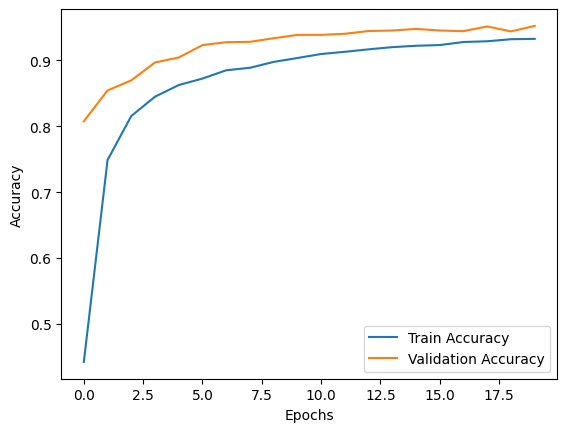

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Confusion Matrix
Y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


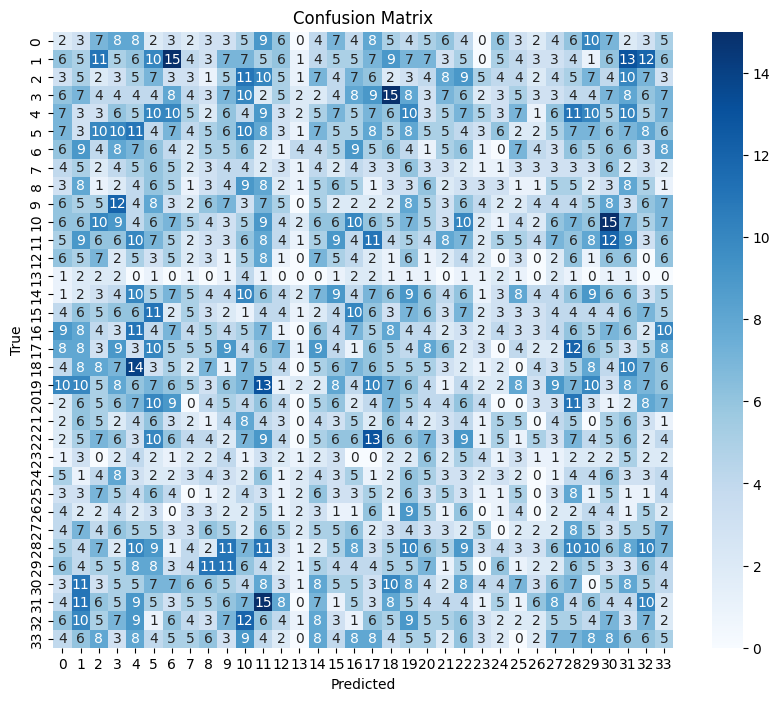

In [11]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Function to preprocess and predict the digit
def predict_digit(image_path, model, class_indices):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((img_width, img_height))  # Resize to match the model input size
    img_array = np.array(img) / 255.0          # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=(0, -1))  # Add batch and channel dimensions

In [13]:
def predict_digit(image_path, model, class_indices):
    try:
        # Load the image
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        img = img.resize((img_width, img_height))  # Resize to match the model input size
        img_array = np.array(img) / 255.0          # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=(0, -1))  # Add batch and channel dimensions

        # Predict the digit
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]

        # Map predicted class to label
        label_map = {v: k for k, v in class_indices.items()}  # Reverse the class_indices
        predicted_label = label_map[predicted_class]

        return predicted_label, prediction
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None
